# Machine Learning Model Training

A dataset consists of physiochemical properties of a selection of Portuguese Vinho Verde wines.

Some wines are red, some are white. A boolean label for high-quality white wines has been provided.



In [1]:
import re

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler

# You may import sklearn models of your choosing. For example,
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('data.csv')

df.head()

,volatile acidity,free sulfur dioxide,chlorides,density,pH,quality white
0,0.76 g(acetic acid)/dm^3,27.0 mg/dm^3,0.043 g(sodium chloride)/dm^3,0.9932 g/cm^3,3.34,False
1,0.46 g(acetic acid)/dm^3,18.0 mg/dm^3,0.077 g(sodium chloride)/dm^3,0.9948 g/cm^3,3.39,False
2,0.41 g(acetic acid)/dm^3,25.0 mg/dm^3,0.033 g(sodium chloride)/dm^3,0.99086 g/cm^3,3.05,True
3,0.21 g(acetic acid)/dm^3,12.0 mg/dm^3,0.038 g(sodium chloride)/dm^3,0.9926 g/cm^3,2.80,False
4,0.22 g(acetic acid)/dm^3,25.0 mg/dm^3,0.033 g(sodium chloride)/dm^3,0.99356 g/cm^3,3.17,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     1000 non-null   object 
 1   free sulfur dioxide  1000 non-null   object 
 2   chlorides            1000 non-null   object 
 3   density              997 non-null    object 
 4   pH                   1000 non-null   float64
 5   quality white        1000 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 40.2+ KB


In [3]:
# this code section is pulled from HO2

def extract_first_number(source_str):
    # `source_str` does not contain interpretable data
    if pd.isna(source_str) or source_str.startswith('NA'):
        
        # use `np.nan` to represent missing data
        return np.nan

    # find instances of a valid numerical substrings in the source string
    # see https://regex101.com/r/gwP6Qy/2 for an explanation
    matches = re.search(r'-?\d+\.?\d*', source_str.replace(',', ''))
    
    # if there are any valid numerical substrings
    if matches:
        return float(matches[0]) # convert the first one to a float and return the value
    else:
        return np.nan # otherwise, treat as missing data

def clean(df, exclude_columns=[]):
    '''
    Convert the columns of a dataframe from strings containing numbers to
    the first number appearing in each string.
    
    Args:
        df: A pandas dataframe
        exclude_columns: A list of columns that should not be converted
        
    Returns:
        A pandas dataframe
    '''
   
    for c in df.columns:
        
        if c not in exclude_columns:          
            for x in df[c]:
                df[c] = df[c].replace(x,extract_first_number(str(x)))
        else:
            pass
        
    return df
    
# perform datacleaning which convert most of the column into float data type for efficiency
# the column quality white is excluded since they serve as boolean type in the dataset
df_1 = clean(df, ['quality white'])
df_1.head()


,volatile acidity,free sulfur dioxide,chlorides,density,pH,quality white
0,0.76,27.0,0.043,0.99320,3.34,False
1,0.46,18.0,0.077,0.99480,3.39,False
2,0.41,25.0,0.033,0.99086,3.05,True
3,0.21,12.0,0.038,0.99260,2.80,False
4,0.22,25.0,0.033,0.99356,3.17,True


In [4]:
#convert all the datatype in dataframe into float type
df_1 = df_1.astype(float)

#drop rows that contains null value
df_1 = df_1.dropna()

df_1.head()

,volatile acidity,free sulfur dioxide,chlorides,density,pH,quality white
0,0.76,27.0,0.043,0.99320,3.34,0.0
1,0.46,18.0,0.077,0.99480,3.39,0.0
2,0.41,25.0,0.033,0.99086,3.05,1.0
3,0.21,12.0,0.038,0.99260,2.80,0.0
4,0.22,25.0,0.033,0.99356,3.17,1.0


In [5]:
# we use corrwith to determine which column can be dropped since the column closest to 0 shouldn't affect the result of "quality white" 
# in that way we can reduce complexity/redundancy of the dataset.
df_1.corrwith(df_1["quality white"]).sort_values(ascending = False)


quality white          1.000000
free sulfur dioxide    0.343997
pH                     0.024124
chlorides             -0.329059
density               -0.363263
volatile acidity      -0.473643
dtype: float64

In [6]:
# turns out pH has a correlation of 0.02, thus we drop this column
df_1 = df_1.drop(columns = ["pH"])

<AxesSubplot:xlabel='volatile acidity', ylabel='quality white'>

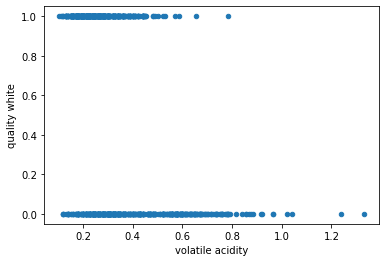

In [7]:
# set a dataframe that contains features only when quality white is true
# the other one contains unqualify wines

df_quality = df_1[df_1['quality white'] == True]

df_unqualify = df_1[df_1['quality white'] == False]


# a scatter plot of volatile acidity as the X-axis and quality white as the y-axis
df_1.plot.scatter(x = 'volatile acidity',y = 'quality white')

array([[<AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

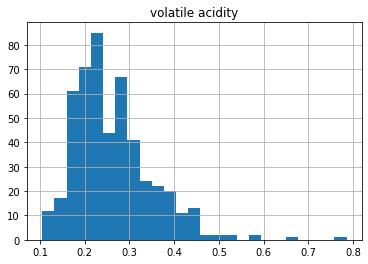

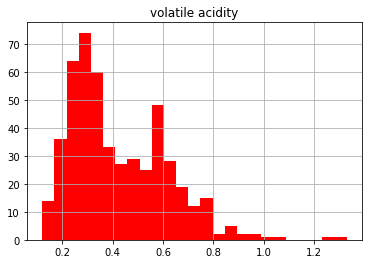

In [8]:
#historgram of volatile acidity on qualify/unqualify
df_quality.hist(column = 'volatile acidity',bins = 25)
df_unqualify.hist(column = 'volatile acidity',bins = 25,color = 'red')

array([[<AxesSubplot:title={'center':'density'}>]], dtype=object)

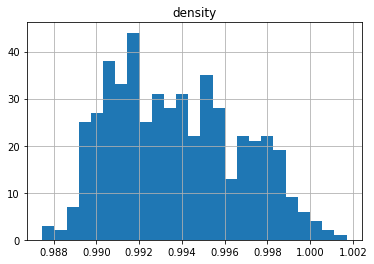

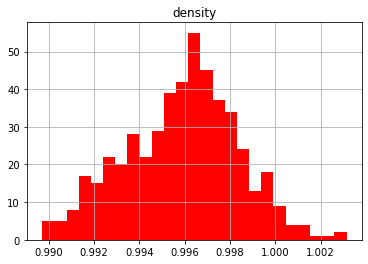

In [9]:
#historgram of density on qualify/unqualify
df_quality.hist(column = 'density',bins = 25)
df_unqualify.hist(column = 'density',bins = 25,color = 'red')

array([[<AxesSubplot:title={'center':'free sulfur dioxide'}>]],
      dtype=object)

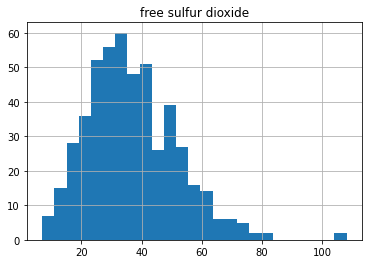

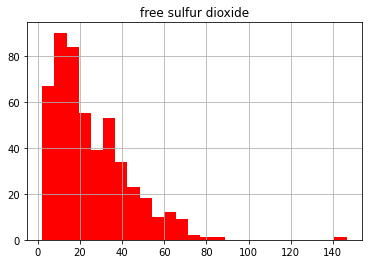

In [10]:
#historgram of free sulfur dioxide on qualify/unqualify
df_quality.hist(column = 'free sulfur dioxide',bins = 25)
df_unqualify.hist(column = 'free sulfur dioxide',bins = 25,color = 'red')

array([[<AxesSubplot:title={'center':'chlorides'}>]], dtype=object)

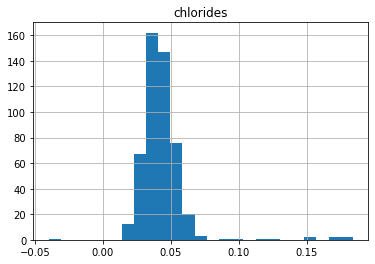

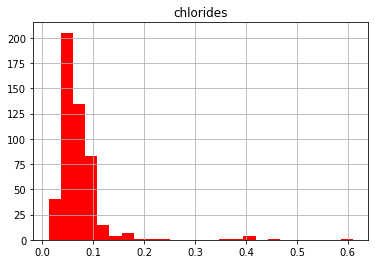

In [11]:
#historgram of chlorides on qualify/unqualify
df_quality.hist(column = 'chlorides',bins = 25)
df_unqualify.hist(column = 'chlorides',bins = 25,color = 'red')

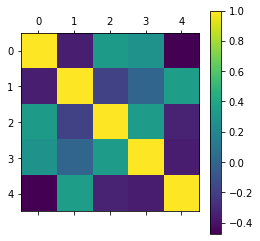

In [12]:
#correlation matrix of the dataset
plt.matshow(df_1.corr())
plt.colorbar()
plt.show()

In [13]:
# code section pulled from HO4

linear_model = SGDClassifier(
    loss='log',
    random_state=0
)
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=0
)
knn_model = KNeighborsClassifier(
    n_neighbors=8
)

models = {
    'linear': linear_model,
    'tree': tree_model, 
    'KNN': knn_model
}

features = ['volatile acidity','density']
label = ['quality white']

X, y = df_1[features], (df_1[label] == 1)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
k = 5
kf = KFold(k)

print("accuracy_score")
linear = []
tree = []
KNN = []

#k_fold_valid, split the dataset into k groups and call model.predict each time.
def K_Fold_Validate(models, kf, X, y):
    
    # initialize dictionary to hold scores
    scores = {
        name: [] for name in models
    }

    for train_index, test_index in kf.split(X):
    
        # split training test sets by index
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # compute the cross-validation score for each model
        # using the same splits
        for name, model in models.items():

            model.fit(X_train, y_train.to_numpy().ravel())
            
            scores[name].append(
                accuracy_score(y_test, model.predict(X_test))
            )

    return {k: np.array(v) for k, v in scores.items()}


scores = K_Fold_Validate(models, kf, X, y)
for k, v in scores.items():
    if k == "linear":
        linear.append(v)
    if k == "KNN":
        KNN.append(v)
    if k == "tree":
        tree.append(v)
    print(k,v)

print()
# print the result of each models' mean accuracy and standard deviation of it.
print("Mean of linear",np.mean(linear)," and std of accuracy",np.std(linear))
print("Mean of tree",np.mean(tree)," and std of accuracy",np.std(tree))
print("Mean of KNN",np.mean(KNN)," and std of accuracy",np.std(KNN))


accuracy_score
linear [0.645      0.68       0.70351759 0.71356784 0.62311558]
tree [0.75       0.755      0.74371859 0.78894472 0.72361809]
KNN [0.675      0.695      0.68341709 0.74874372 0.68341709]

Mean of linear 0.6730402010050252  and std of accuracy 0.03434682005481116
Mean of tree 0.7522562814070353  and std of accuracy 0.021221209647319394
Mean of KNN 0.6971155778894472  and std of accuracy 0.026586977109753378


In [14]:
from scipy import stats

# code section pulled from HO4
def p_value(model1_scores, model2_scores):
    '''
    return probability of null hypothesis 
    (that points were sampled from same distribution)
    '''
    
    # Your code here
    t = 0
    length = len(model1_scores)
    tri = []
    for i in range(length):
        tri.append(model1_scores[i] - model2_scores[i])
        
    tri_bar = np.mean(tri)
    sd = []
    for i in range(length):
        sd.append((tri[i] - tri_bar)**2)
    
    s_tri = np.sqrt(np.mean(sd)) 
    t = tri_bar / (s_tri / np.sqrt(length-1))
    # compute the pvalue from a two-tailed t-statistic `t`
    pval = stats.t.sf(np.abs(t), len(model1_scores)-1) * 2
    
    return pval

linear_model = SGDClassifier(
    loss='log',
    random_state=0
)
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=0
)
knn_model = KNeighborsClassifier(
    n_neighbors=8
)

models = {
    'linear': linear_model,
    'tree': tree_model, 
    'KNN': knn_model
}

# selected features and response label
features = ['volatile acidity','density']
label = ['quality white']

X, y = df_1[features], df_1[label] > 0

k = 5
kf = KFold(k)

# call k_fold_validate
scores = K_Fold_Validate(models, kf, X, y)

# we calculate the p-values between each pair of models
def report(a, b):
    pval = p_value(scores[a], scores[b])
    print(f'prob. that avg. accuracy score for {a} and {b} are the same:', pval)
    if pval <= 0.05:
        print('Difference between mean performance is probably real')
    else:
        print('Algorithms probably have the same performance')


report('linear', 'tree')
report('linear', 'KNN')
report('KNN', 'tree')

prob. that avg. accuracy score for linear and tree are the same: 0.0023737730656246308
Difference between mean performance is probably real
prob. that avg. accuracy score for linear and KNN are the same: 0.14308441204342473
Algorithms probably have the same performance
prob. that avg. accuracy score for KNN and tree are the same: 0.0011714078405512078
Difference between mean performance is probably real


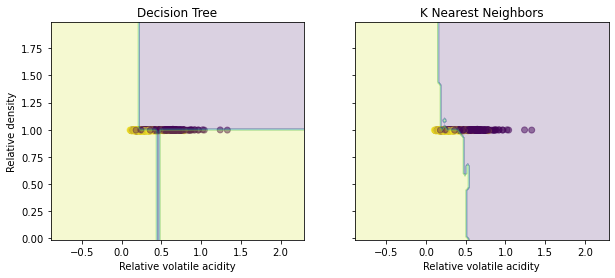

In [15]:

linear_model = SGDClassifier(
    loss='log',
    random_state=0
)

tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=0
)
knn_model = KNeighborsClassifier(
    n_neighbors=8
)

models = {
    'linear': linear_model,
    'tree': tree_model, 
    'KNN': knn_model
}

features = ['volatile acidity','density']
label = ['quality white']

X, y = df_1[features], (df_1[label] > 0).values.ravel()
tree_model.fit(X,y)
knn_model.fit(X,y)


# data range
x_min, x_max = df[features[0]].min() - 1, df[features[0]].max() + 1
y_min, y_max = df[features[1]].min() - 1, df[features[1]].max() + 1

# meshgrid
res = (x_max - x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, res), np.arange(y_min, y_max, res))

Z_tree = tree_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_knn = knn_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.scatter(df[features[0]], df[features[1]], c=np.array(df[label] > 0), alpha=0.5)
ax1.contourf(xx, yy, Z_tree, alpha=0.2)
ax1.set_xlabel(f'Relative {features[0]}'), 
ax1.set_ylabel(f'Relative {features[1]}'), ax1.set_title('Decision Tree')

ax2.scatter(df[features[0]], df[features[1]], c=np.array(df[label] > 0), alpha=0.5)
ax2.contourf(xx, yy, Z_knn, alpha=0.2)
ax2.set_xlabel(f'Relative {features[0]}'), ax2.set_title('K Nearest Neighbors')

plt.show()